___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://machinelearningmastery.com/wp-content/uploads/2016/03/Compare-Machine-Learning-Algorithms.png" width="350px" height="180px" />


# <font color= #8A0829> Laboratorio de Modelado de Datos </font>
#### <font color= #2E9AFE> `Martes y Viernes (Videoconferencia) de 13:00 - 15:00 hrs`</font>
- <Strong> Sara Eugenia Rodríguez </Strong>
- <Strong> Año </Strong>: 2022
- <Strong> Email: </Strong>  <font color="blue"> `cd682324@iteso.mx` </font>
___


### <font color= #2E9AFE> Tema: Comparación de modelos de regresión</font>

Una vez que aprendimos a crear los modelos de machine learning ¿qué hacemos con ellos?

Comparar varios modelos de machine learning para problemas de regresión es necesario para poder encontrar cuál de todos los modelos es el más eficiente y tiene los resultados más precisos. 

Hay muchos criterios para comparar los modelos. 

Recordando que si la **variable de respuesta es continua** entonces, este es un problema de **regresión** y tenemos que usar modelos de regresión para estimar los valores predichos. 

Como vimos, hay muchos modelos de regresión candidatos. Nuestra tarea es encontrar el que sirva a nuestro propósito.

Vamos a comparar los siguientes modelos:
- Regresión lineal múltiple
- Regresión LASSO
- Regresión Ridge
- Árbol de decisión
- Bosques Aleatorios
- SVR
- Redes Neuronales

Vamos a utilizar varias métricas para comparar los modelos.

### Métricas de Performance (Regresión)

**Error Absoluto Medio (Mean Absolute Error - MAE)**

Si $y$ es la variable de respuesta y $\hat{y}$ es la predicción, entonces el MAE es el error entre estos pares ($y$,$\hat{y}$) de variables y se calcula de la forma:

$$MAE = \frac{\sum_{i=1}^{n}|y_{i}-\hat{y}_{i}|}{n}$$

*¿Qué hace?*
- Mide el promedio del error absoluto entre los valores reales y las predicciones

*Ventajas*
- Es una métrica independiente de la escala, lo que significa que está en las mismas unidades de las variables originales. 
- Fácil de interpretar
- Es buena opción si no nos importan los valores atípicos

*Desventajas*
- Se les da la misma importancia (peso) a todos los errores
- Es insensible a valores atípicos



**Error Cuadrático Medio (Mean Square Error - MSE)**


$$MSE = \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{n}$$

*¿Qué hace?*
El MSE calcula el promedio de los cuadrados del error entre los valores verdaderos y los valores estimados

*Ventajas*
- Función diferenciable
- El efecto de errores más grandes se vuelve más pronunciado que los errores más pequeños

*Desventajas*
- Tiene diferentes unidades que los valores reales


**Diferencia entre el MAE y el MSE**

La gran diferencia es cómo responden a errores más grandes. 

Depende mucho de la decisión del negocio y el costo asociado a los errores. 
     
 **R^2**
 
 $$R^{2}=1-\frac{SS_{res}}{SS_{Tot}}= \frac{\sum_{i=1}^{n}(y_{i}-\hat{y}_{i})^{2}}{\sum_{i=1}^{n}(y_{i}-\bar{y}_{i})^{2}}$$
 
 *¿Qué hace?*
- Explica la proporción de la varianza de la salida ("Y") que puede ser explicada por los predictores ("X")

*Desventajas*
- Siempre incrementa añadiendo más variables independientes (X), lo cual es una desventaja porque esas variables pueden no ser importantes para el modelo

*Ventajas*
- Es una métrica relativa que se usa para comparar varios modelos que fueron entrenados con los mismos datos

     
     
 

### Los Datos

Tenemos un dataset de personas que tienen un carro y lo quieren vender. Se tienen las siguientes variables:

- Age 
- Gender
- Miles: promedio de millas manejadas por día
- Debt
- Income
- Sales

Basados en esas variables, queremos predecir el valor potencial de venta de un carro, por lo que variable a predecir es "Sales". 

In [1]:
#Librerías

import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
import seaborn as sns 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import SGD, Adam


In [2]:
#cargar datos
datos = pd.read_csv('carros.csv')
datos.head()

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438


In [3]:
#Revisamos si hay datos nulos
missing = pd.DataFrame(datos.isnull().sum(),columns=['Valores_Nulos'])
missing

,Valores_Nulos
age,0
gender,0
miles,0
debt,0
income,0
sales,0


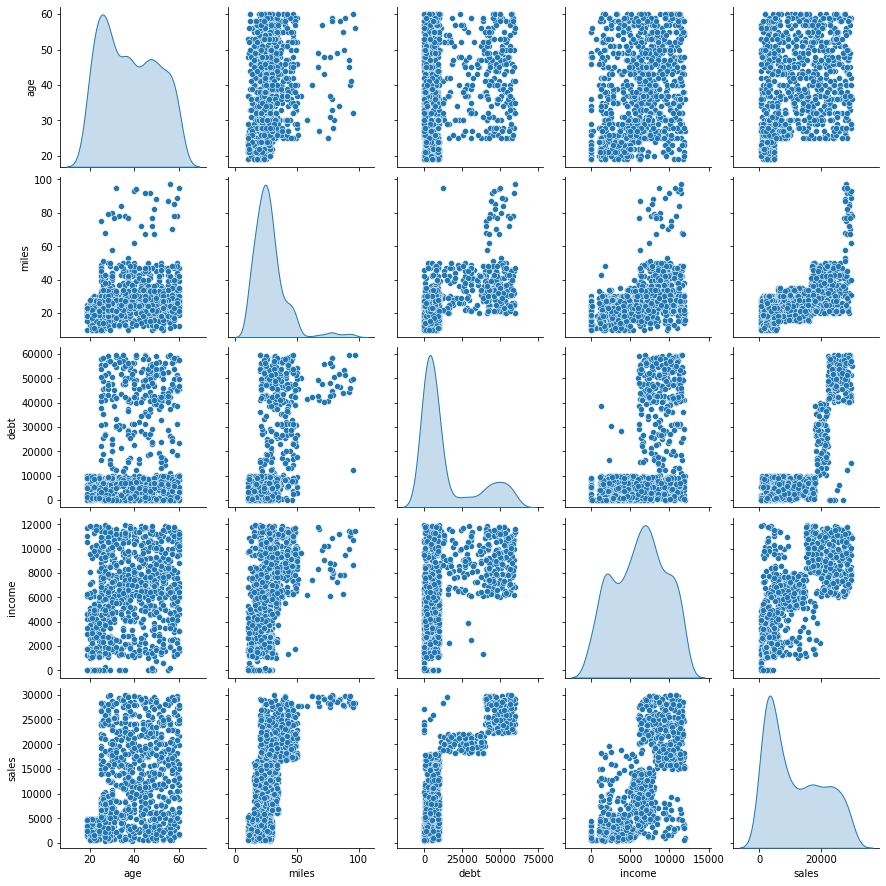

In [4]:
#Creamos gráficos básicos de los datos
sns.pairplot(datos[['age', 'miles', 'debt', 'income', 'sales']], diag_kind="kde")

In [5]:
#Calculando estadísticas básicas con los datos
datos_stats = datos.describe()
datos_stats = datos_stats.transpose()
datos_stats

,count,mean,std,min,25%,50%,75%,max
age,963.0,37.971963,12.290838,19.0,27.0,37.0,49.0,60.0
gender,963.0,0.512980,0.500091,0.0,0.0,1.0,1.0,1.0
miles,963.0,27.704050,13.378181,10.0,20.0,25.0,32.0,97.0
debt,963.0,14109.004154,18273.702481,0.0,1475.0,6236.0,16686.0,59770.0
income,963.0,6176.047767,3260.670142,0.0,3506.5,6360.0,8649.5,11970.0
sales,963.0,11689.860852,8986.896921,500.0,3554.0,9130.0,19245.0,29926.0


De las estadísticas anteriores podemos observar que algunas variables tienen grandes rangos y desviaciones, lo cual puede crear problemas durante el ajuste del modelo. Por lo tanto sería buena idea escalar los datos. 

### Train Test split

In [6]:
#separar la X y Y
X=datos.iloc[:,0:5]
y=datos.iloc[:,5]

#Dividimos los datos en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
#Estandarizar datos
from sklearn import preprocessing
X_train = preprocessing.scale(X_train)
y_train = preprocessing.scale(y_train)
X_test = preprocessing.scale(X_test)
y_test = preprocessing.scale(y_test)

**¿Porqué estandarizar los datos después del train test split?**

El escalamiento debe realizarse después de dividir los datos en entrenamiento y prueba, y se debe hacer sólo usando los datos de entrenamiento. 

Esto se debe a que los datos de prueba (test) tienen el papel de datos no vistos por el modelo, por lo que se supone que estos datos no están accesibles en la estapa del entrenamiento. 

Usar cualquier información proveniente de los datos de prueba antes o durante el entranamiento puede afectar al desempeño del modelo

#### Regresión Lineal 


In [8]:
#Inicializo objeto de regresión lineal
lin_reg = LinearRegression()
#Entrenar modelo
lin_reg.fit(X_train, y_train)
#Predecimos con datos de prueba
y_pred = lin_reg.predict(X_test)
#Métricas de performance
mae_lr = metrics.mean_absolute_error(y_test, y_pred)
mse_lr = metrics.mean_squared_error(y_test, y_pred)
r2_lr = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2, MAE, MSE, RMSE')
r2_lr, mae_lr, mse_lr, np.sqrt(mse_lr)

R2, MAE, MSE, RMSE


(0.8364108886819762, 0.3119007815345352, 0.1635891113180238, 0.404461507832357)

#### Regresión Lineal con selección de variables

In [9]:
#Entrenar modelo
rfe = RFE(lin_reg, n_features_to_select = 4)
rfe = rfe.fit(X_train, y_train)

#Predecimos con datos de prueba
y_pred = rfe.predict(X_test)

#Métricas de performance
mae_rfe = metrics.mean_absolute_error(y_test, y_pred)
mse_rfe = metrics.mean_squared_error(y_test, y_pred)
r2_rfe = metrics.r2_score(y_test, y_pred)

# Imprimir resultados
print('R2, MAE, MSE, RMSE')
r2_rfe, mae_rfe, mse_rfe, np.sqrt(mse_lr)

# Imprimir resultados


R2, MAE, MSE, RMSE


(0.8367174006172184,
 0.31150993315869785,
 0.16328259938278153,
 0.404461507832357)

#### Regresión Lineal con regularización Ridge


In [10]:
#Inicializo modelo de ridge con alpha = 1
ridge = Ridge(alpha=1)
#Entrenar modelo
ridge.fit(X_train,y_train)
#Predecir con datos de prueba
ridge_pred = ridge.predict(X_test)

#Métricas de performance
mae_ridge = metrics.mean_absolute_error(y_test, ridge_pred)
mse_ridge=metrics.mean_squared_error(y_test, ridge_pred)
r2_ridge = r2_score(y_test, ridge_pred)

# Imprimir resultados
print('R2:  ',r2_ridge)
print('MAE: ', mae_ridge)
print('MSE: ', mse_ridge)
print('RMSE:', np.sqrt(mse_ridge))

R2:   0.8364172531254732
MAE:  0.3119341315613785
MSE:  0.16358274687452684
RMSE: 0.4044536399570745


#### Bosques Aleatorios

In [11]:
#Inicializamos el bosque con 300 árboles
rf_regressor = RandomForestRegressor(n_estimators = 300 ,  random_state = 0)
rf_regressor.fit(X_train,y_train)

#Predecir el precio de venta  
y_pred = rf_regressor.predict(X_test)

#Calcular métricas
mae_rf=metrics.mean_absolute_error(y_test, y_pred)
mse_rf=metrics.mean_squared_error(y_test, y_pred)
r2_rf=metrics.r2_score(y_test, y_pred)

#Imprimir métricas
print('R2 square:',r2_rf)
print('MAE: ', mae_rf)
print('MSE: ', mse_rf)

R2 square: 0.9084579202821852
MAE:  0.21442115274283988
MSE:  0.09154207971781475


#### Máquina de Soporte Vectorial para Regresión (SVR)

In [12]:
#Inicializar objeto
regressor= SVR(kernel='rbf')
#Entrenar modelo
regressor.fit(X_train,y_train)
#Predecir
y_pred_svm=regressor.predict(X_test)

#Calcular métricas
mae_svr=metrics.mean_absolute_error(y_test, y_pred_svm)
mse_svr=metrics.mean_squared_error(y_test, y_pred_svm)
r2_svr=metrics.r2_score(y_test, y_pred_svm)

# Imprimir Métricas
print('R2 square:',r2_svr)
print('MAE: ', mae_svr)
print('MSE: ', mse_svr)

R2 square: 0.8939968531978245
MAE:  0.2368613686845287
MSE:  0.1060031468021755


#### Red Neuronal

In [13]:
#Hiperparámetros iniciales
epochs = 1000
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8

# Crear arquitectura de la red neuronal
model = Sequential()
#5 variables de entrada, por lo tanto input_dim=5
model.add(Dense(12,activation='relu',input_dim=5))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='linear'))

# Configuración del optimizador
#gradiente descendente
opt = keras.optimizers.SGD(lr=learning_rate,momentum=momentum,
                           decay=decay_rate,nesterov=True)
#opt = keras.optimizers.Adam(lr=0.09)
model.compile(loss = 'mean_squared_error',
              optimizer=opt,
              metrics=['mae','mse'])

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [14]:
#Ajustar modelo
history = model.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))

Epoch 1/1000
4/4 [==============================] - 2s 137ms/step - loss: 0.6156 - mae: 0.6827 - mse: 0.6156 - val_loss: 0.2611 - val_mae: 0.4079 - val_mse: 0.2611
Epoch 2/1000
4/4 [==============================] - 0s 43ms/step - loss: 0.2677 - mae: 0.3994 - mse: 0.2677 - val_loss: 0.2040 - val_mae: 0.3547 - val_mse: 0.2040
Epoch 3/1000
4/4 [==============================] - 0s 23ms/step - loss: 0.2079 - mae: 0.3567 - mse: 0.2079 - val_loss: 0.1811 - val_mae: 0.3206 - val_mse: 0.1811
Epoch 4/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1954 - mae: 0.3311 - mse: 0.1954 - val_loss: 0.1678 - val_mae: 0.3071 - val_mse: 0.1678
Epoch 5/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1819 - mae: 0.3200 - mse: 0.1819 - val_loss: 0.1643 - val_mae: 0.3112 - val_mse: 0.1643
Epoch 6/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1773 - mae: 0.3186 - mse: 0.1773 - val_loss: 0.1534 - val_mae: 0.2990 - val_mse: 0.1534
Epoch 7/1000
4/4 [===

4/4 [==============================] - 0s 17ms/step - loss: 0.1302 - mae: 0.2653 - mse: 0.1302 - val_loss: 0.1014 - val_mae: 0.2365 - val_mse: 0.1014
Epoch 52/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1239 - mae: 0.2552 - mse: 0.1239 - val_loss: 0.1068 - val_mae: 0.2370 - val_mse: 0.1068
Epoch 53/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1242 - mae: 0.2578 - mse: 0.1242 - val_loss: 0.1183 - val_mae: 0.2525 - val_mse: 0.1183
Epoch 54/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1281 - mae: 0.2587 - mse: 0.1281 - val_loss: 0.1239 - val_mae: 0.2809 - val_mse: 0.1239
Epoch 55/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1280 - mae: 0.2678 - mse: 0.1280 - val_loss: 0.1044 - val_mae: 0.2361 - val_mse: 0.1044
Epoch 56/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1216 - mae: 0.2541 - mse: 0.1216 - val_loss: 0.1071 - val_mae: 0.2526 - val_mse: 0.1071
Epoch 57/1000
4/4 [===========

4/4 [==============================] - 0s 17ms/step - loss: 0.1174 - mae: 0.2494 - mse: 0.1174 - val_loss: 0.1204 - val_mae: 0.2545 - val_mse: 0.1204
Epoch 102/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1269 - mae: 0.2643 - mse: 0.1269 - val_loss: 0.1040 - val_mae: 0.2384 - val_mse: 0.1040
Epoch 103/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1173 - mae: 0.2499 - mse: 0.1173 - val_loss: 0.1029 - val_mae: 0.2346 - val_mse: 0.1029
Epoch 104/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1177 - mae: 0.2488 - mse: 0.1177 - val_loss: 0.1065 - val_mae: 0.2544 - val_mse: 0.1065
Epoch 105/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1237 - mae: 0.2605 - mse: 0.1237 - val_loss: 0.1172 - val_mae: 0.2529 - val_mse: 0.1172
Epoch 106/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1201 - mae: 0.2521 - mse: 0.1201 - val_loss: 0.1109 - val_mae: 0.2416 - val_mse: 0.1109
Epoch 107/1000
4/4 [=====

Epoch 151/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1159 - mae: 0.2447 - mse: 0.1159 - val_loss: 0.1204 - val_mae: 0.2549 - val_mse: 0.1204
Epoch 152/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1349 - mae: 0.2720 - mse: 0.1349 - val_loss: 0.1027 - val_mae: 0.2349 - val_mse: 0.1027
Epoch 153/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1139 - mae: 0.2438 - mse: 0.1139 - val_loss: 0.1017 - val_mae: 0.2351 - val_mse: 0.1017
Epoch 154/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1135 - mae: 0.2424 - mse: 0.1135 - val_loss: 0.1034 - val_mae: 0.2359 - val_mse: 0.1034
Epoch 155/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1143 - mae: 0.2443 - mse: 0.1143 - val_loss: 0.1065 - val_mae: 0.2513 - val_mse: 0.1065
Epoch 156/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1160 - mae: 0.2474 - mse: 0.1160 - val_loss: 0.1149 - val_mae: 0.2485 - val_mse: 0.1149
Epoch 157/

Epoch 201/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1109 - mae: 0.2405 - mse: 0.1109 - val_loss: 0.1125 - val_mae: 0.2431 - val_mse: 0.1125
Epoch 202/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1161 - mae: 0.2437 - mse: 0.1161 - val_loss: 0.1053 - val_mae: 0.2359 - val_mse: 0.1053
Epoch 203/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1112 - mae: 0.2381 - mse: 0.1112 - val_loss: 0.1128 - val_mae: 0.2445 - val_mse: 0.1128
Epoch 204/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1295 - mae: 0.2663 - mse: 0.1295 - val_loss: 0.1094 - val_mae: 0.2543 - val_mse: 0.1094
Epoch 205/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1192 - mae: 0.2567 - mse: 0.1192 - val_loss: 0.1072 - val_mae: 0.2518 - val_mse: 0.1072
Epoch 206/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1156 - mae: 0.2477 - mse: 0.1156 - val_loss: 0.1033 - val_mae: 0.2402 - val_mse: 0.1033
Epoch 207/

Epoch 251/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1137 - mae: 0.2425 - mse: 0.1137 - val_loss: 0.1045 - val_mae: 0.2445 - val_mse: 0.1045
Epoch 252/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1105 - mae: 0.2405 - mse: 0.1105 - val_loss: 0.1223 - val_mae: 0.2549 - val_mse: 0.1223
Epoch 253/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1186 - mae: 0.2471 - mse: 0.1186 - val_loss: 0.1053 - val_mae: 0.2348 - val_mse: 0.1053
Epoch 254/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1093 - mae: 0.2376 - mse: 0.1093 - val_loss: 0.1123 - val_mae: 0.2447 - val_mse: 0.1123
Epoch 255/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1137 - mae: 0.2411 - mse: 0.1137 - val_loss: 0.1031 - val_mae: 0.2330 - val_mse: 0.1031
Epoch 256/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1083 - mae: 0.2349 - mse: 0.1083 - val_loss: 0.1098 - val_mae: 0.2410 - val_mse: 0.1098
Epoch 257/

Epoch 301/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1163 - mae: 0.2503 - mse: 0.1163 - val_loss: 0.1073 - val_mae: 0.2388 - val_mse: 0.1073
Epoch 302/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1096 - mae: 0.2376 - mse: 0.1096 - val_loss: 0.1137 - val_mae: 0.2657 - val_mse: 0.1137
Epoch 303/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1130 - mae: 0.2457 - mse: 0.1130 - val_loss: 0.1061 - val_mae: 0.2382 - val_mse: 0.1061
Epoch 304/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1084 - mae: 0.2368 - mse: 0.1084 - val_loss: 0.1019 - val_mae: 0.2349 - val_mse: 0.1019
Epoch 305/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1090 - mae: 0.2363 - mse: 0.1090 - val_loss: 0.1081 - val_mae: 0.2535 - val_mse: 0.1081
Epoch 306/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1133 - mae: 0.2477 - mse: 0.1133 - val_loss: 0.1249 - val_mae: 0.2577 - val_mse: 0.1249
Epoch 307/

Epoch 351/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1123 - mae: 0.2413 - mse: 0.1123 - val_loss: 0.1082 - val_mae: 0.2387 - val_mse: 0.1082
Epoch 352/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1077 - mae: 0.2354 - mse: 0.1077 - val_loss: 0.1057 - val_mae: 0.2357 - val_mse: 0.1057
Epoch 353/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1092 - mae: 0.2368 - mse: 0.1092 - val_loss: 0.1149 - val_mae: 0.2676 - val_mse: 0.1149
Epoch 354/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1149 - mae: 0.2477 - mse: 0.1149 - val_loss: 0.1021 - val_mae: 0.2363 - val_mse: 0.1021
Epoch 355/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1078 - mae: 0.2362 - mse: 0.1078 - val_loss: 0.1112 - val_mae: 0.2414 - val_mse: 0.1112
Epoch 356/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1100 - mae: 0.2379 - mse: 0.1100 - val_loss: 0.1075 - val_mae: 0.2398 - val_mse: 0.1075
Epoch 357/

Epoch 401/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1073 - mae: 0.2400 - mse: 0.1073 - val_loss: 0.1167 - val_mae: 0.2727 - val_mse: 0.1167
Epoch 402/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1090 - mae: 0.2421 - mse: 0.1090 - val_loss: 0.1047 - val_mae: 0.2429 - val_mse: 0.1047
Epoch 403/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1060 - mae: 0.2324 - mse: 0.1060 - val_loss: 0.1064 - val_mae: 0.2507 - val_mse: 0.1064
Epoch 404/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1065 - mae: 0.2370 - mse: 0.1065 - val_loss: 0.1084 - val_mae: 0.2377 - val_mse: 0.1084
Epoch 405/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1056 - mae: 0.2338 - mse: 0.1056 - val_loss: 0.1106 - val_mae: 0.2627 - val_mse: 0.1106
Epoch 406/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1088 - mae: 0.2414 - mse: 0.1088 - val_loss: 0.1045 - val_mae: 0.2367 - val_mse: 0.1045
Epoch 407/

Epoch 451/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1077 - mae: 0.2410 - mse: 0.1077 - val_loss: 0.1054 - val_mae: 0.2470 - val_mse: 0.1054
Epoch 452/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1077 - mae: 0.2370 - mse: 0.1077 - val_loss: 0.1151 - val_mae: 0.2682 - val_mse: 0.1151
Epoch 453/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1096 - mae: 0.2436 - mse: 0.1096 - val_loss: 0.1083 - val_mae: 0.2496 - val_mse: 0.1083
Epoch 454/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1045 - mae: 0.2331 - mse: 0.1045 - val_loss: 0.1161 - val_mae: 0.2674 - val_mse: 0.1161
Epoch 455/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1051 - mae: 0.2394 - mse: 0.1051 - val_loss: 0.1370 - val_mae: 0.2706 - val_mse: 0.1370
Epoch 456/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1115 - mae: 0.2452 - mse: 0.1115 - val_loss: 0.1055 - val_mae: 0.2469 - val_mse: 0.1055
Epoch 457/

Epoch 501/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1014 - mae: 0.2326 - mse: 0.1014 - val_loss: 0.1083 - val_mae: 0.2503 - val_mse: 0.1083
Epoch 502/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1026 - mae: 0.2337 - mse: 0.1026 - val_loss: 0.1253 - val_mae: 0.2598 - val_mse: 0.1253
Epoch 503/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1061 - mae: 0.2339 - mse: 0.1061 - val_loss: 0.1083 - val_mae: 0.2463 - val_mse: 0.1083
Epoch 504/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1004 - mae: 0.2285 - mse: 0.1004 - val_loss: 0.1211 - val_mae: 0.2543 - val_mse: 0.1211
Epoch 505/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1085 - mae: 0.2379 - mse: 0.1085 - val_loss: 0.1111 - val_mae: 0.2603 - val_mse: 0.1111
Epoch 506/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1008 - mae: 0.2326 - mse: 0.1008 - val_loss: 0.1096 - val_mae: 0.2492 - val_mse: 0.1096
Epoch 507/

Epoch 551/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1003 - mae: 0.2252 - mse: 0.1003 - val_loss: 0.1201 - val_mae: 0.2720 - val_mse: 0.1201
Epoch 552/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1052 - mae: 0.2384 - mse: 0.1052 - val_loss: 0.1103 - val_mae: 0.2491 - val_mse: 0.1103
Epoch 553/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0996 - mae: 0.2264 - mse: 0.0996 - val_loss: 0.1176 - val_mae: 0.2489 - val_mse: 0.1176
Epoch 554/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1028 - mae: 0.2302 - mse: 0.1028 - val_loss: 0.1253 - val_mae: 0.2586 - val_mse: 0.1253
Epoch 555/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1156 - mae: 0.2470 - mse: 0.1156 - val_loss: 0.1506 - val_mae: 0.2887 - val_mse: 0.1506
Epoch 556/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1128 - mae: 0.2475 - mse: 0.1128 - val_loss: 0.1089 - val_mae: 0.2543 - val_mse: 0.1089
Epoch 557/

Epoch 601/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0998 - mae: 0.2243 - mse: 0.0998 - val_loss: 0.1435 - val_mae: 0.3102 - val_mse: 0.1435
Epoch 602/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1203 - mae: 0.2621 - mse: 0.1203 - val_loss: 0.1113 - val_mae: 0.2482 - val_mse: 0.1113
Epoch 603/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0998 - mae: 0.2277 - mse: 0.0998 - val_loss: 0.1130 - val_mae: 0.2547 - val_mse: 0.1130
Epoch 604/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0990 - mae: 0.2285 - mse: 0.0990 - val_loss: 0.1119 - val_mae: 0.2436 - val_mse: 0.1119
Epoch 605/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1000 - mae: 0.2276 - mse: 0.1000 - val_loss: 0.1159 - val_mae: 0.2608 - val_mse: 0.1159
Epoch 606/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0988 - mae: 0.2279 - mse: 0.0988 - val_loss: 0.1137 - val_mae: 0.2590 - val_mse: 0.1137
Epoch 607/

Epoch 651/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0991 - mae: 0.2287 - mse: 0.0991 - val_loss: 0.1095 - val_mae: 0.2460 - val_mse: 0.1095
Epoch 652/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1000 - mae: 0.2299 - mse: 0.1000 - val_loss: 0.1106 - val_mae: 0.2466 - val_mse: 0.1106
Epoch 653/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.1015 - mae: 0.2303 - mse: 0.1015 - val_loss: 0.1127 - val_mae: 0.2463 - val_mse: 0.1127
Epoch 654/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1024 - mae: 0.2288 - mse: 0.1024 - val_loss: 0.1243 - val_mae: 0.2659 - val_mse: 0.1243
Epoch 655/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.1012 - mae: 0.2345 - mse: 0.1012 - val_loss: 0.1150 - val_mae: 0.2481 - val_mse: 0.1150
Epoch 656/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0983 - mae: 0.2269 - mse: 0.0983 - val_loss: 0.1157 - val_mae: 0.2478 - val_mse: 0.1157
Epoch 657/

Epoch 701/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1024 - mae: 0.2303 - mse: 0.1024 - val_loss: 0.1518 - val_mae: 0.3197 - val_mse: 0.1518
Epoch 702/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1063 - mae: 0.2408 - mse: 0.1063 - val_loss: 0.1152 - val_mae: 0.2534 - val_mse: 0.1152
Epoch 703/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0964 - mae: 0.2243 - mse: 0.0964 - val_loss: 0.1166 - val_mae: 0.2486 - val_mse: 0.1166
Epoch 704/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1030 - mae: 0.2310 - mse: 0.1030 - val_loss: 0.1194 - val_mae: 0.2618 - val_mse: 0.1194
Epoch 705/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0973 - mae: 0.2243 - mse: 0.0973 - val_loss: 0.1131 - val_mae: 0.2511 - val_mse: 0.1131
Epoch 706/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.1001 - mae: 0.2292 - mse: 0.1001 - val_loss: 0.1212 - val_mae: 0.2522 - val_mse: 0.1212
Epoch 707/

Epoch 751/1000
4/4 [==============================] - 0s 19ms/step - loss: 0.0976 - mae: 0.2233 - mse: 0.0976 - val_loss: 0.1193 - val_mae: 0.2542 - val_mse: 0.1193
Epoch 752/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0963 - mae: 0.2213 - mse: 0.0963 - val_loss: 0.1178 - val_mae: 0.2532 - val_mse: 0.1178
Epoch 753/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0958 - mae: 0.2233 - mse: 0.0958 - val_loss: 0.1236 - val_mae: 0.2576 - val_mse: 0.1236
Epoch 754/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0982 - mae: 0.2257 - mse: 0.0982 - val_loss: 0.1181 - val_mae: 0.2513 - val_mse: 0.1181
Epoch 755/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0968 - mae: 0.2235 - mse: 0.0968 - val_loss: 0.1114 - val_mae: 0.2451 - val_mse: 0.1114
Epoch 756/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0982 - mae: 0.2243 - mse: 0.0982 - val_loss: 0.1223 - val_mae: 0.2741 - val_mse: 0.1223
Epoch 757/

Epoch 801/1000
4/4 [==============================] - 0s 12ms/step - loss: 0.1097 - mae: 0.2425 - mse: 0.1097 - val_loss: 0.1191 - val_mae: 0.2544 - val_mse: 0.1191
Epoch 802/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.0974 - mae: 0.2237 - mse: 0.0974 - val_loss: 0.1155 - val_mae: 0.2544 - val_mse: 0.1155
Epoch 803/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0949 - mae: 0.2214 - mse: 0.0949 - val_loss: 0.1176 - val_mae: 0.2484 - val_mse: 0.1176
Epoch 804/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0954 - mae: 0.2207 - mse: 0.0954 - val_loss: 0.1240 - val_mae: 0.2720 - val_mse: 0.1240
Epoch 805/1000
4/4 [==============================] - 0s 22ms/step - loss: 0.0992 - mae: 0.2305 - mse: 0.0992 - val_loss: 0.1213 - val_mae: 0.2640 - val_mse: 0.1213
Epoch 806/1000
4/4 [==============================] - 0s 21ms/step - loss: 0.0967 - mae: 0.2246 - mse: 0.0967 - val_loss: 0.1232 - val_mae: 0.2752 - val_mse: 0.1232
Epoch 807/

Epoch 851/1000
4/4 [==============================] - 0s 18ms/step - loss: 0.1002 - mae: 0.2285 - mse: 0.1002 - val_loss: 0.1492 - val_mae: 0.3136 - val_mse: 0.1492
Epoch 852/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.1025 - mae: 0.2373 - mse: 0.1025 - val_loss: 0.1322 - val_mae: 0.2848 - val_mse: 0.1322
Epoch 853/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0995 - mae: 0.2303 - mse: 0.0995 - val_loss: 0.1201 - val_mae: 0.2572 - val_mse: 0.1201
Epoch 854/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0963 - mae: 0.2242 - mse: 0.0963 - val_loss: 0.1186 - val_mae: 0.2507 - val_mse: 0.1186
Epoch 855/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0955 - mae: 0.2211 - mse: 0.0955 - val_loss: 0.1230 - val_mae: 0.2641 - val_mse: 0.1230
Epoch 856/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0952 - mae: 0.2204 - mse: 0.0952 - val_loss: 0.1205 - val_mae: 0.2662 - val_mse: 0.1205
Epoch 857/

Epoch 901/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.0962 - mae: 0.2253 - mse: 0.0962 - val_loss: 0.1244 - val_mae: 0.2626 - val_mse: 0.1244
Epoch 902/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0951 - mae: 0.2225 - mse: 0.0951 - val_loss: 0.1209 - val_mae: 0.2537 - val_mse: 0.1209
Epoch 903/1000
4/4 [==============================] - 0s 13ms/step - loss: 0.0970 - mae: 0.2240 - mse: 0.0970 - val_loss: 0.1297 - val_mae: 0.2815 - val_mse: 0.1297
Epoch 904/1000
4/4 [==============================] - 0s 15ms/step - loss: 0.1021 - mae: 0.2346 - mse: 0.1021 - val_loss: 0.1405 - val_mae: 0.2985 - val_mse: 0.1405
Epoch 905/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.1018 - mae: 0.2337 - mse: 0.1018 - val_loss: 0.1265 - val_mae: 0.2682 - val_mse: 0.1265
Epoch 906/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0957 - mae: 0.2246 - mse: 0.0957 - val_loss: 0.1210 - val_mae: 0.2539 - val_mse: 0.1210
Epoch 907/

Epoch 951/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0952 - mae: 0.2216 - mse: 0.0952 - val_loss: 0.1226 - val_mae: 0.2570 - val_mse: 0.1226
Epoch 952/1000
4/4 [==============================] - 0s 17ms/step - loss: 0.0991 - mae: 0.2268 - mse: 0.0991 - val_loss: 0.1264 - val_mae: 0.2641 - val_mse: 0.1264
Epoch 953/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0989 - mae: 0.2287 - mse: 0.0989 - val_loss: 0.1225 - val_mae: 0.2568 - val_mse: 0.1225
Epoch 954/1000
4/4 [==============================] - 0s 14ms/step - loss: 0.0953 - mae: 0.2248 - mse: 0.0953 - val_loss: 0.1306 - val_mae: 0.2823 - val_mse: 0.1306
Epoch 955/1000
4/4 [==============================] - 0s 16ms/step - loss: 0.0963 - mae: 0.2258 - mse: 0.0963 - val_loss: 0.1664 - val_mae: 0.3370 - val_mse: 0.1664
Epoch 956/1000
4/4 [==============================] - 0s 20ms/step - loss: 0.1140 - mae: 0.2514 - mse: 0.1140 - val_loss: 0.1251 - val_mae: 0.2616 - val_mse: 0.1251
Epoch 957/

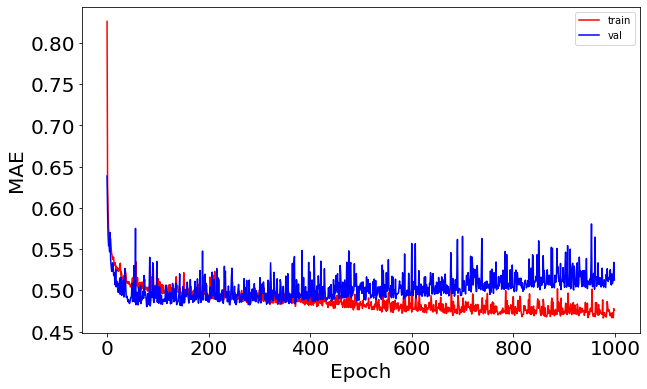

In [15]:
#Graficar el MAE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mae']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mae']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MAE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

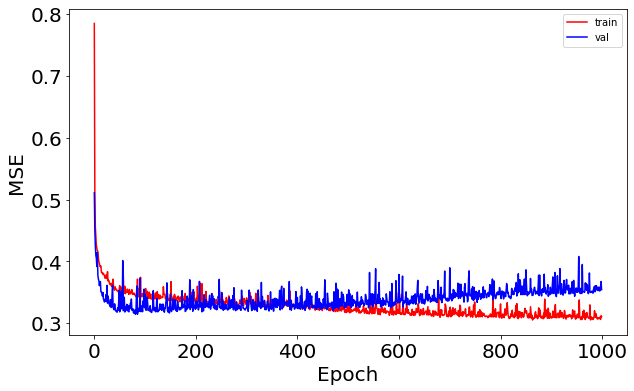

In [16]:
#Graficar el MSE
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

Con los gráficos de arriba podemos observar que tanto las métricas de train y de validación disminuyen exponencialmentes con el incremento del número de épocas. 

10/10 [==============================] - 0s 3ms/step


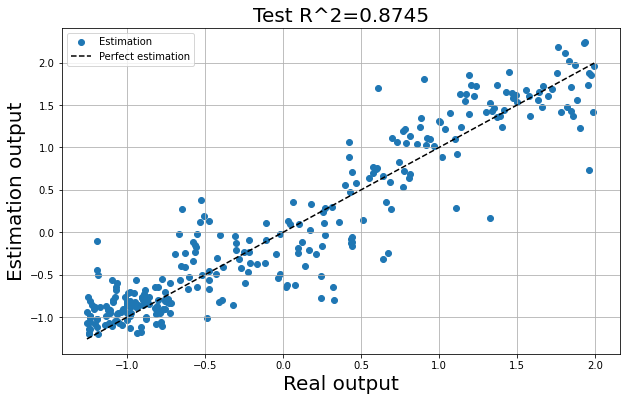

In [17]:
#Predecir
yhat = model.predict(X_test)

#Calcular R2
R2_score = r2_score(y_test,yhat)

#Graficar la R2
xmin,xmax = min(y_test),max(y_test)
xline = np.linspace(xmin,xmax)
fig = plt.figure(figsize=(10,6))
plt.scatter(y_test,yhat,label='Estimation')
plt.plot(xline,xline,'k--',label='Perfect estimation')
plt.xlabel('Real output', fontsize=20)
plt.ylabel('Estimation output', fontsize=20)
plt.title('Test R^2=%0.4f'%R2_score, fontsize=20)
plt.legend()
plt.grid()
plt.show()

In [18]:
#Calcular métricas
mae_nn=metrics.mean_absolute_error(y_test, yhat)
mse_nn=metrics.mean_squared_error(y_test, yhat)
r2_nn=metrics.r2_score(y_test, yhat)

# imprimir Métricas
print('R2 square:',r2_nn)
print('MAE: ', mae_nn)
print('MSE: ', mse_nn)

R2 square: 0.874506854889289
MAE:  0.2625934882327303
MSE:  0.12549314511071094


#### Resultados con train test split

In [19]:
data_compar_train_test = {'Modelo': ['LR', 'LR RFE', 'Ridge', 'RF', ' SVR', 'NN'], 'R2': [r2_lr, r2_rfe, r2_ridge, r2_rf, r2_svr, r2_nn], 'MSE': [mse_lr, mse_rfe, mse_ridge, mse_rf, mse_svr, mse_nn], 'MAE': [mae_lr, mae_rfe, mae_ridge,mae_rf,mae_svr, mae_nn]} 
data_compar_train_test = pd.DataFrame(data_compar_train_test)
data_compar_train_test

,Modelo,R2,MSE,MAE
0,LR,0.836411,0.163589,0.311901
1,LR RFE,0.836717,0.163283,0.311510
2,Ridge,0.836417,0.163583,0.311934
3,RF,0.908458,0.091542,0.214421
4,SVR,0.893997,0.106003,0.236861
5,NN,0.874507,0.125493,0.262593


### Cross Validation con optimización de hiperparámetros

La idea es dividir los datos en train y test, entrenar múltiples modelos muestreando los datos de entrenamiento. 
Finalmente probar el modelo en el test set



<img style="float: center; margin: 0px 0px 15px 15px;" src="https://miro.medium.com/max/700/1*4G__SV580CxFj78o9yUXuQ.png" width="450px" height="280px" />


In [20]:
#Configurar los folds que vamos a usar para todos los modelos
n_folds = 5
seed = 7
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, random_state=seed, shuffle=True)

#### Regresión Lineal

In [21]:
#Inicializar modelo
lm=LinearRegression()

#Hacer el cross validation y probar con el train
r2_lr= (cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_lr= -(cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_lr= (-cross_val_score(lm, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_lr)
print("MAE Train", mae_lr)
print("MSE Train", mse_lr)

R2 train 0.8158013380172221
MAE Train 0.3258039481837593
MSE Train 0.18158541560608504


In [22]:
#Performance en el test
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

mae_lr=metrics.mean_absolute_error(y_test,y_pred)
mse_lr=metrics.mean_squared_error(y_test,y_pred)
r2_lr=metrics.r2_score(y_test,y_pred)

results_lr = pd.DataFrame([['Linear regression', mae_lr,mse_lr,r2_lr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_lr


,Model,MAE,MSE,R2
0,Linear regression,0.311901,0.163589,0.836411


#### Regresión lineal con selección de variables (RFE)

In [23]:
# Hacer el grid search
#Especificar el modelo
lm = LinearRegression()
#Ajustar datos
lm.fit(X_train, y_train)
#Inicializar modelo de Recursive Feature Elimination para selección de variables
rfe = RFE(lm)             

#Especificar rango de hiperparámetros a tunear
hyper_params = [{'n_features_to_select': list(range(1, np.shape(X_train)[1]+1))}]

# Crear el grid search
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_squared_error', 
                        cv = kfold, 
                        verbose = 1,
                        return_train_score=True)      


#Performance en el test
model_cv.fit(X_train,y_train)
y_pred = model_cv.predict(X_test)

mae_rfe=metrics.mean_absolute_error(y_test,y_pred)
mse_rfe=metrics.mean_squared_error(y_test,y_pred)
r2_rfe=metrics.r2_score(y_test,y_pred)

results_rfe = pd.DataFrame([['Linear regression RFE', mae_rfe,mse_rfe,r2_rfe]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rfe

Fitting 5 folds for each of 5 candidates, totalling 25 fits


,Model,MAE,MSE,R2
0,Linear regression RFE,0.31151,0.163283,0.836717


#### Rigde

In [24]:
from sklearn.linear_model import RidgeCV
#Inicializar modelo de Ridge con cross validation para seleccionar el hiperparámetro de alpha óptimo
model = RidgeCV(alphas=np.arange(0.01,5,0.01), cv=kfold, scoring='neg_mean_squared_error') 
#Entreno modelo
model.fit(X_train, y_train)

#Alfa óptima
print('alfa: %f' % model.alpha_)

#Performance en el test
y_pred = model.predict(X_test)

mae_ridge=metrics.mean_absolute_error(y_test,y_pred)
mse_ridge=metrics.mean_squared_error(y_test,y_pred)
r2_ridge=metrics.r2_score(y_test,y_pred)

results_ridge = pd.DataFrame([['Linear regression Ridge', mae_ridge,mse_ridge,r2_ridge]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_ridge

alfa: 4.240000


,Model,MAE,MSE,R2
0,Linear regression Ridge,0.312042,0.163572,0.836428


#### Random Forest



In [25]:
from sklearn.ensemble import RandomForestRegressor

#Usando cross validation y grid search
from sklearn.model_selection import GridSearchCV
#Inicializo modelo
model = RandomForestRegressor(min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Grid search para optimizar hiperparámetros
gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11), #profundidad del árbol
                                'min_samples_split': range(10, 60, 10),
                                'n_estimators': [100, 300, 500, 800], #número de árboles
                                'criterion': ['mse']}, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')
gs.fit(X_train, y_train)

print(gs.best_params_)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

{'criterion': 'mse', 'max_depth': 8, 'min_samples_split': 30, 'n_estimators': 800}


In [26]:
#crear modelo usando parámetros óptimos
new_model_RF = RandomForestRegressor(n_estimators=800,
                               criterion='mse',
                               max_depth=8,
                               min_samples_split=30,
                               min_samples_leaf=1,
                               max_features='auto',
                               bootstrap=True,
                               oob_score=False,
                               random_state=0,
                               verbose=0)
#Entreno modelo optimizado
new_model_RF.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_rf= (cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_rf= -(cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_rf= (-cross_val_score(new_model_RF, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_rf)
print("MAE Train", mae_rf)
print("MSE Train", mse_rf)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 train 0.8920603214443167
MAE Train 0.21984381446970488
MSE Train 0.10667653653789569


In [27]:
#Performance en el test
y_pred = new_model_RF.predict(X_test)

mae_rf=metrics.mean_absolute_error(y_test,y_pred)
mse_rf=metrics.mean_squared_error(y_test,y_pred)
r2_rf=metrics.r2_score(y_test,y_pred)

results_rf = pd.DataFrame([['Random Forest', mae_rf,mse_rf,r2_rf]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_rf

,Model,MAE,MSE,R2
0,Random Forest,0.208829,0.085517,0.914483


#### Árbol de decisión

In [28]:
#Usando cross validation y grid search
tree = DecisionTreeRegressor()

#Grid search para optimizar hiperparámetros
gs = GridSearchCV(tree,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'max_depth': 7, 'min_samples_split': 50}


In [29]:
#crear modelo usando parámetros óptimos
new_model_tree = DecisionTreeRegressor(max_depth=7,
                                  min_samples_split=50)

#Entreno modelo optimizado
new_model_tree.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_tree= (cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_tree= -(cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_tree= (-cross_val_score(new_model_tree, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_tree)
print("MAE Train", mae_tree)
print("MSE Train", mse_tree)

R2 train 0.8833332245009938
MAE Train 0.22517186175054055
MSE Train 0.11514499443663609


In [30]:
#Performance en el test
y_pred = new_model_tree.predict(X_test)

mae_tree=metrics.mean_absolute_error(y_test,y_pred)
mse_tree=metrics.mean_squared_error(y_test,y_pred)
r2_tree=metrics.r2_score(y_test,y_pred)

results_tree = pd.DataFrame([['Decision Tree', mae_tree,mse_tree,r2_tree]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_tree 

,Model,MAE,MSE,R2
0,Decision Tree,0.2231,0.108104,0.891896


#### Máquina de vector soporte (SVR)

In [31]:
#proponer malla para el gridsearch
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

model = SVR()

gs = GridSearchCV(model,
                  tuned_parameters, 
                  cv=kfold,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [32]:
#crear modelo usando parámetros óptimos
new_model_svr = SVR(kernel='rbf', C=1000, gamma=0.001)

#Entreno modelo optimizado
new_model_svr.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_svr= (cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_svr= -(cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_svr= (-cross_val_score(new_model_svr, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_svr)
print("MAE Train", mae_svr)
print("MSE Train", mse_svr)

R2 train 0.8456219414725519
MAE Train 0.28604529302008386
MSE Train 0.15140710445214095


In [33]:
#Performance en el test
y_pred = new_model_svr.predict(X_test)

mae_svr=metrics.mean_absolute_error(y_test,y_pred)
mse_svr=metrics.mean_squared_error(y_test,y_pred)
r2_svr=metrics.r2_score(y_test,y_pred)

results_svr = pd.DataFrame([['SVR', mae_svr,mse_svr,r2_svr]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_svr 

,Model,MAE,MSE,R2
0,SVR,0.257272,0.118553,0.881447


#### Red Neuronal

In [34]:
def create_model(lr=0.1,momentum=0.8):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)

# Definir los parámetros del grid search
lr = [0.1, 0.05, 0.01]
momentum = [0.8, 0.6, 0.4]
param_grid = dict(lr=lr,momentum=momentum)

selection_score = make_scorer(mean_squared_error,greater_is_better=False) #MSE

grid = GridSearchCV(estimator=model_search, param_grid=param_grid,
                    cv=kfold,return_train_score=True,
                    scoring=selection_score)

grid_result = grid.fit(X_train, y_train)

print('Mejores parámetros:')
print(grid_result.best_params_)


Epoch 1/200


C:\Users\sduen\AppData\Local\Temp\ipykernel_3380\368372331.py:17: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)
D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.3640 - mse: 0.3640
Epoch 2/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1933 - mse: 0.1933
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1756 - mse: 0.1756
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1589 - mse: 0.1589
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1570 - mse: 0.1570
Epoch 6/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1450 - mse: 0.1450
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1545 - mse: 0.1545
Epoch 8/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1434 - mse: 0.1434
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1363 - mse: 0.1363
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.1643
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1038 - mse: 0.1038
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1061 - mse: 0.1061
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0984 - mse: 0.0984
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1014 - mse: 0.1014
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1028 - mse: 0.1028
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1015 - mse: 0.1015
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1020 - mse: 0.1020
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1033 - mse: 0.1033
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0991 - mse: 0.0991
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0939 - mse: 0.0939
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4741 - mse: 0.4741
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1888 - mse: 0.1888
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1763 - mse: 0.1763
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1648 - mse: 0.1648
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1583 - mse: 0.1583
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1465 - mse: 0.1465
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1600 - mse: 0.1600
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2120 - mse: 0.2120
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1458 - mse: 0.1458
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1379 - mse: 0.1379
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1205 - mse: 0.1205
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1157 - mse: 0.1157
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1125 - mse: 0.1125
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.1134
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1240 - mse: 0.1240
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3091 - mse: 0.3091
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1615 - mse: 0.1615
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1553 - mse: 0.1553
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1646 - mse: 0.1646
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1392 - mse: 0.1392
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1413 - mse: 0.1413
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1351 - mse: 0.1351
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1404 - mse: 0.1404
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1336 - mse: 0.1336
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1133 - mse: 0.1133
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0998 - mse: 0.0998
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1014 - mse: 0.1014
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1006 - mse: 0.1006
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1072 - mse: 0.1072
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1043 - mse: 0.1043
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1045 - mse: 0.1045
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4249 - mse: 0.4249
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1753 - mse: 0.1753
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1706 - mse: 0.1706
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1706 - mse: 0.1706
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1749 - mse: 0.1749
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.1485
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1516 - mse: 0.1516
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1585 - mse: 0.1585
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1085 - mse: 0.1085
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0949 - mse: 0.0949
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1044 - mse: 0.1044
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0915 - mse: 0.0915
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0974 - mse: 0.0974
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0961 - mse: 0.0961
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0922 - mse: 0.0922
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0992 - mse: 0.0992
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5708 - mse: 0.5708
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1993 - mse: 0.1993
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1917 - mse: 0.1917
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1766 - mse: 0.1766
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1631 - mse: 0.1631
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1584 - mse: 0.1584
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1585 - mse: 0.1585
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1590 - mse: 0.1590
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.1643
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1634 - mse: 0.1634
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1186 - mse: 0.1186
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1295 - mse: 0.1295
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1040 - mse: 0.1040
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1010 - mse: 0.1010
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1080 - mse: 0.1080
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1059 - mse: 0.1059
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3721 - mse: 0.3721
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2019 - mse: 0.2019
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1746 - mse: 0.1746
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1627 - mse: 0.1627
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1563 - mse: 0.1563
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1474 - mse: 0.1474
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1502 - mse: 0.1502
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1437 - mse: 0.1437
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1490 - mse: 0.1490
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - mse: 0.1084
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1109 - mse: 0.1109
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1041 - mse: 0.1041
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1038 - mse: 0.1038
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1068 - mse: 0.1068
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1060 - mse: 0.1060
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - mse: 0.1051
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1079 - mse: 0.1079
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0968 - mse: 0.0968
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0991 - mse: 0.0991
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0968 - mse: 0.0968
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0993 - mse: 0.0993
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0987 - mse: 0.0987
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0951 - mse: 0.0951
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0932 - mse: 0.0932
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1017 - mse: 0.1017
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4635 - mse: 0.4635
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2173 - mse: 0.2173
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1909 - mse: 0.1909
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1759 - mse: 0.1759
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1661 - mse: 0.1661
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1660 - mse: 0.1660
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1614 - mse: 0.1614
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1551 - mse: 0.1551
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1250 - mse: 0.1250
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1214 - mse: 0.1214
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3711 - mse: 0.3711
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1787 - mse: 0.1787
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1522 - mse: 0.1522
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1485 - mse: 0.1485
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1451 - mse: 0.1451
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1424 - mse: 0.1424
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.1297
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1407 - mse: 0.1407
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1396 - mse: 0.1396
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1135 - mse: 0.1135
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0997 - mse: 0.0997
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1019 - mse: 0.1019
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0987 - mse: 0.0987
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1008 - mse: 0.1008
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1012 - mse: 0.1012
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0980 - mse: 0.0980
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0979 - mse: 0.0979
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1000 - mse: 0.1000
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3351 - mse: 0.3351
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1945 - mse: 0.1945
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1762 - mse: 0.1762
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1648 - mse: 0.1648
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1514 - mse: 0.1514
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1541 - mse: 0.1541
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1599 - mse: 0.1599
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1425 - mse: 0.1425
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1401 - mse: 0.1401
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1092 - mse: 0.1092
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1151 - mse: 0.1151
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1089 - mse: 0.1089
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1074 - mse: 0.1074
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - mse: 0.1084
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1042 - mse: 0.1042
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1100 - mse: 0.1100
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1047 - mse: 0.1047
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - mse: 0.1084
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3940 - mse: 0.3940
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1843 - mse: 0.1843
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1645 - mse: 0.1645
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1576 - mse: 0.1576
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1555 - mse: 0.1555
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1540 - mse: 0.1540
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1576 - mse: 0.1576
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1478 - mse: 0.1478
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1482 - mse: 0.1482
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1175 - mse: 0.1175
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3828 - mse: 0.3828
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1864 - mse: 0.1864
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1682 - mse: 0.1682
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1636 - mse: 0.1636
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1628 - mse: 0.1628
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - mse: 0.1528
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1515 - mse: 0.1515
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.1560
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1541 - mse: 0.1541
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1466 - mse: 0.1466
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1127 - mse: 0.1127
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1118 - mse: 0.1118
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1060 - mse: 0.1060
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - mse: 0.1051
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1068 - mse: 0.1068
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1024 - mse: 0.1024
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1085 - mse: 0.1085
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1035 - mse: 0.1035
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1115 - mse: 0.1115
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3963 - mse: 0.3963
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2249 - mse: 0.2249
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1976 - mse: 0.1976
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1865 - mse: 0.1865
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1724 - mse: 0.1724
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1679 - mse: 0.1679
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1622 - mse: 0.1622
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1649 - mse: 0.1649
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1633 - mse: 0.1633
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1237 - mse: 0.1237
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1250 - mse: 0.1250
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1225 - mse: 0.1225
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1242 - mse: 0.1242
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1166 - mse: 0.1166
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1147 - mse: 0.1147
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3590 - mse: 0.3590
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.1760
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1628 - mse: 0.1628
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1555 - mse: 0.1555
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1466 - mse: 0.1466
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1450 - mse: 0.1450
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1420 - mse: 0.1420
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1363 - mse: 0.1363
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1105 - mse: 0.1105
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1048 - mse: 0.1048
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1064 - mse: 0.1064
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1056 - mse: 0.1056
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1064 - mse: 0.1064
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1035 - mse: 0.1035
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1044 - mse: 0.1044
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3203 - mse: 0.3203
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2176 - mse: 0.2176
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1998 - mse: 0.1998
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1871 - mse: 0.1871
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1795 - mse: 0.1795
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1748 - mse: 0.1748
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1642 - mse: 0.1642
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1614 - mse: 0.1614
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1576 - mse: 0.1576
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1528 - mse: 0.1528
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1140 - mse: 0.1140
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1100 - mse: 0.1100
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1037 - mse: 0.1037
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1026 - mse: 0.1026
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1049 - mse: 0.1049
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1091 - mse: 0.1091
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1024 - mse: 0.1024
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1027 - mse: 0.1027
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3104 - mse: 0.3104
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1974 - mse: 0.1974
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1856 - mse: 0.1856
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1658 - mse: 0.1658
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1610 - mse: 0.1610
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1536 - mse: 0.1536
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1604 - mse: 0.1604
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1617 - mse: 0.1617
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1582 - mse: 0.1582
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1182 - mse: 0.1182
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.4866 - mse: 0.4866
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.1886
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1682 - mse: 0.1682
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1617 - mse: 0.1617
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1661 - mse: 0.1661
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1506 - mse: 0.1506
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1401 - mse: 0.1401
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1389 - mse: 0.1389
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1355 - mse: 0.1355
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1119 - mse: 0.1119
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1076 - mse: 0.1076
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1062 - mse: 0.1062
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1128 - mse: 0.1128
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1061 - mse: 0.1061
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1029 - mse: 0.1029
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1048 - mse: 0.1048
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1020 - mse: 0.1020
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1022 - mse: 0.1022
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1001 - mse: 0.1001
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1031 - mse: 0.1031
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1066 - mse: 0.1066
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4584 - mse: 0.4584
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1855 - mse: 0.1855
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1665 - mse: 0.1665
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1543 - mse: 0.1543
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1558 - mse: 0.1558
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1499 - mse: 0.1499
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1463 - mse: 0.1463
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1385 - mse: 0.1385
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1396 - mse: 0.1396
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1187 - mse: 0.1187
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1063 - mse: 0.1063
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1061 - mse: 0.1061
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1023 - mse: 0.1023
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.7571 - mse: 0.7571
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1967 - mse: 0.1967
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1643 - mse: 0.1643
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1488 - mse: 0.1488
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1387 - mse: 0.1387
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1360 - mse: 0.1360
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1336 - mse: 0.1336
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1291 - mse: 0.1291
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.0950 - mse: 0.0950
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0973 - mse: 0.0973
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.0914 - mse: 0.0914
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0955 - mse: 0.0955
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1000 - mse: 0.1000
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0935 - mse: 0.0935
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0916 - mse: 0.0916
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0956 - mse: 0.0956
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0957 - mse: 0.0957
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0947 - mse: 0.0947
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0871 - mse: 0.0871
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0870 - mse: 0.0870
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0828 - mse: 0.0828
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0906 - mse: 0.0906
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0886 - mse: 0.0886
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0869 - mse: 0.0869
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0867 - mse: 0.0867
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0859 - mse: 0.0859
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0882 - mse: 0.0882
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0874 - mse: 0.0874
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6936 - mse: 0.6936
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1891 - mse: 0.1891
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1694 - mse: 0.1694
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1555 - mse: 0.1555
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1541 - mse: 0.1541
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.1498
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1489 - mse: 0.1489
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1431 - mse: 0.1431
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1446 - mse: 0.1446
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1179 - mse: 0.1179
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1155 - mse: 0.1155
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1095 - mse: 0.1095
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1122 - mse: 0.1122
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1123 - mse: 0.1123
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1058 - mse: 0.1058
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1072 - mse: 0.1072
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1056 - mse: 0.1056
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1071 - mse: 0.1071
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4261 - mse: 0.4261
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2045 - mse: 0.2045
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1903 - mse: 0.1903
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1725 - mse: 0.1725
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1671 - mse: 0.1671
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1666 - mse: 0.1666
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1618 - mse: 0.1618
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1512 - mse: 0.1512
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1552 - mse: 0.1552
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1098 - mse: 0.1098
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1098 - mse: 0.1098
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1040 - mse: 0.1040
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1085 - mse: 0.1085
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1073 - mse: 0.1073
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0966 - mse: 0.0966
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1007 - mse: 0.1007
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0990 - mse: 0.0990
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1031 - mse: 0.1031
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1005 - mse: 0.1005
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1075 - mse: 0.1075
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1033 - mse: 0.1033
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0959 - mse: 0.0959
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4775 - mse: 0.4775
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1783 - mse: 0.1783
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1675 - mse: 0.1675
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1569 - mse: 0.1569
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1567 - mse: 0.1567
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1483 - mse: 0.1483
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1501 - mse: 0.1501
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1415 - mse: 0.1415
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1449 - mse: 0.1449
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 1ms/step - loss: 0.1204 - mse: 0.1204
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1226 - mse: 0.1226
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1184 - mse: 0.1184
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1108 - mse: 0.1108
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1126 - mse: 0.1126
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1084 - mse: 0.1084
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1112 - mse: 0.1112
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3250 - mse: 0.3250
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.1886
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1691 - mse: 0.1691
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1579 - mse: 0.1579
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1563 - mse: 0.1563
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1565 - mse: 0.1565
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1529 - mse: 0.1529
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1490 - mse: 0.1490
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1488 - mse: 0.1488
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1261 - mse: 0.1261
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1227 - mse: 0.1227
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1208 - mse: 0.1208
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1235 - mse: 0.1235
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1141 - mse: 0.1141
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3870 - mse: 0.3870
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1866 - mse: 0.1866
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1686 - mse: 0.1686
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1587 - mse: 0.1587
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1514 - mse: 0.1514
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1496 - mse: 0.1496
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1400 - mse: 0.1400
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.1375
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1144 - mse: 0.1144
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1126 - mse: 0.1126
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1056 - mse: 0.1056
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1073 - mse: 0.1073
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1067 - mse: 0.1067
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6907 - mse: 0.6907
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2473 - mse: 0.2473
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1982 - mse: 0.1982
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1720 - mse: 0.1720
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1716 - mse: 0.1716
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1690 - mse: 0.1690
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1698 - mse: 0.1698
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1626 - mse: 0.1626
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1586 - mse: 0.1586
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1576 - mse: 0.1576
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1266 - mse: 0.1266
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.1268
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.1284
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1269 - mse: 0.1269
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1137 - mse: 0.1137
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1162 - mse: 0.1162
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1201 - mse: 0.1201
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1178 - mse: 0.1178
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3705 - mse: 0.3705
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1843 - mse: 0.1843
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1676 - mse: 0.1676
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1625 - mse: 0.1625
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1589 - mse: 0.1589
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1478 - mse: 0.1478
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1492 - mse: 0.1492
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1409 - mse: 0.1409
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1388 - mse: 0.1388
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1399 - mse: 0.1399
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1167 - mse: 0.1167
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1102 - mse: 0.1102
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1119 - mse: 0.1119
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1115 - mse: 0.1115
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1128 - mse: 0.1128
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3357 - mse: 0.3357
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2066 - mse: 0.2066
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1759 - mse: 0.1759
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1715 - mse: 0.1715
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1653 - mse: 0.1653
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1279 - mse: 0.1279
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1190 - mse: 0.1190
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5315 - mse: 0.5315
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2182 - mse: 0.2182
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1857 - mse: 0.1857
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1746 - mse: 0.1746
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1670 - mse: 0.1670
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1606 - mse: 0.1606
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1560 - mse: 0.1560
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1554 - mse: 0.1554
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 10/200
17/17 [==============================] - 0s 5ms/step - loss: 0.1510 - mse: 0.1510
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1265 - mse: 0.1265
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1170 - mse: 0.1170
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1180 - mse: 0.1180
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5908 - mse: 0.5908
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2073 - mse: 0.2073
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1839 - mse: 0.1839
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1756 - mse: 0.1756
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1632 - mse: 0.1632
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1602 - mse: 0.1602
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1514 - mse: 0.1514
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 10/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1408 - mse: 0.1408
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 3ms/step - loss: 0.1059 - mse: 0.1059
Epoch 88/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1059 - mse: 0.1059
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1055 - mse: 0.1055
Epoch 90/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1043 - mse: 0.1043
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1070 - mse: 0.1070
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1067 - mse: 0.1067
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1054 - mse: 0.1054
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.0996 - mse: 0.0996
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1039 - mse: 0.1039
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0991 - mse: 0.0991
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0987 - mse: 0.0987
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0981 - mse: 0.0981
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0977 - mse: 0.0977
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0988 - mse: 0.0988
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0970 - mse: 0.0970
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0985 - mse: 0.0985
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.0989 - mse: 0.0989
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.5408 - mse: 0.5408
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2562 - mse: 0.2562
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2165 - mse: 0.2165
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1989 - mse: 0.1989
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1840 - mse: 0.1840
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1775 - mse: 0.1775
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1679 - mse: 0.1679
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1630 - mse: 0.1630
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1613 - mse: 0.1613
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1581 - mse: 0.1581
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1215 - mse: 0.1215
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1221 - mse: 0.1221
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 95/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1208 - mse: 0.1208
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1159 - mse: 0.1159
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1154 - mse: 0.1154
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1145 - mse: 0.1145
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1165 - mse: 0.1165
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.3781 - mse: 0.3781
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1856 - mse: 0.1856
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1768 - mse: 0.1768
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1705 - mse: 0.1705
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1656 - mse: 0.1656
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1625 - mse: 0.1625
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1596 - mse: 0.1596
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1607 - mse: 0.1607
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1565 - mse: 0.1565
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1206 - mse: 0.1206
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1203 - mse: 0.1203
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1194 - mse: 0.1194
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1093 - mse: 0.1093
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1116 - mse: 0.1116
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1127 - mse: 0.1127
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1107 - mse: 0.1107
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1095 - mse: 0.1095
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1087 - mse: 0.1087
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1101 - mse: 0.1101
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6010 - mse: 0.6010
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2267 - mse: 0.2267
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1996 - mse: 0.1996
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1890 - mse: 0.1890
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1830 - mse: 0.1830
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1780 - mse: 0.1780
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1722 - mse: 0.1722
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1688 - mse: 0.1688
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1656 - mse: 0.1656
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1653 - mse: 0.1653
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1257 - mse: 0.1257
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1249 - mse: 0.1249
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1249 - mse: 0.1249
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1265 - mse: 0.1265
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1166 - mse: 0.1166
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1143 - mse: 0.1143
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1134 - mse: 0.1134
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1138 - mse: 0.1138
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1183 - mse: 0.1183
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4840 - mse: 0.4840
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2229 - mse: 0.2229
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.2060
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1976 - mse: 0.1976
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1868 - mse: 0.1868
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1812 - mse: 0.1812
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1753 - mse: 0.1753
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1696 - mse: 0.1696
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1685 - mse: 0.1685
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1621 - mse: 0.1621
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1186 - mse: 0.1186
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1184 - mse: 0.1184
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1185 - mse: 0.1185
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1181 - mse: 0.1181
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1114 - mse: 0.1114
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1118 - mse: 0.1118
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1108 - mse: 0.1108
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1110 - mse: 0.1110
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1106 - mse: 0.1106
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1094 - mse: 0.1094
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1104 - mse: 0.1104
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1117 - mse: 0.1117
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8144 - mse: 0.8144
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3083 - mse: 0.3083
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2070 - mse: 0.2070
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1909 - mse: 0.1909
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1810 - mse: 0.1810
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1770 - mse: 0.1770
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1696 - mse: 0.1696
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1644 - mse: 0.1644
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1610 - mse: 0.1610
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1588 - mse: 0.1588
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1157 - mse: 0.1157
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1146 - mse: 0.1146
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1161 - mse: 0.1161
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1187 - mse: 0.1187
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1056 - mse: 0.1056
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1043 - mse: 0.1043
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1077 - mse: 0.1077
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1065 - mse: 0.1065
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1048 - mse: 0.1048
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1051 - mse: 0.1051
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1046 - mse: 0.1046
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1053 - mse: 0.1053
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6902 - mse: 0.6902
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3172 - mse: 0.3172
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2484 - mse: 0.2484
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2205 - mse: 0.2205
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2038 - mse: 0.2038
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1957 - mse: 0.1957
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1853 - mse: 0.1853
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1784 - mse: 0.1784
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1758 - mse: 0.1758
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1697 - mse: 0.1697
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1155 - mse: 0.1155
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1156 - mse: 0.1156
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1148 - mse: 0.1148
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1158 - mse: 0.1158
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1150 - mse: 0.1150
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1147 - mse: 0.1147
Epoch 181/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1156 - mse: 0.1156
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.4896 - mse: 0.4896
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2216 - mse: 0.2216
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1886 - mse: 0.1886
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1727 - mse: 0.1727
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1644 - mse: 0.1644
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1571 - mse: 0.1571
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1525 - mse: 0.1525
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1486 - mse: 0.1486
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1470 - mse: 0.1470
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1217 - mse: 0.1217
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1123 - mse: 0.1123
Epoch 175/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1112 - mse: 0.1112
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1120 - mse: 0.1120
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1113 - mse: 0.1113
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1121 - mse: 0.1121
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1111 - mse: 0.1111
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1106 - mse: 0.1106
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 1.0511 - mse: 1.0511
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5296 - mse: 0.5296
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3863 - mse: 0.3863
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3155 - mse: 0.3155
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2767 - mse: 0.2767
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2503 - mse: 0.2503
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2363 - mse: 0.2363
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2266 - mse: 0.2266
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2194 - mse: 0.2194
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2133 - mse: 0.2133
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1247 - mse: 0.1247
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1255 - mse: 0.1255
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1241 - mse: 0.1241
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1177 - mse: 0.1177
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1182 - mse: 0.1182
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1178 - mse: 0.1178
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1175 - mse: 0.1175
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1169 - mse: 0.1169
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5232 - mse: 0.5232
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3349 - mse: 0.3349
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2861 - mse: 0.2861
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2596 - mse: 0.2596
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2380 - mse: 0.2380
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2212 - mse: 0.2212
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2087 - mse: 0.2087
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2002 - mse: 0.2002
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1937 - mse: 0.1937
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1890 - mse: 0.1890
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1326 - mse: 0.1326
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1321 - mse: 0.1321
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1312 - mse: 0.1312
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1308 - mse: 0.1308
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1308 - mse: 0.1308
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1309 - mse: 0.1309
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.1297
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1197 - mse: 0.1197
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1195 - mse: 0.1195
Epoch 179/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1188 - mse: 0.1188
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6710 - mse: 0.6710
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2993 - mse: 0.2993
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2275 - mse: 0.2275
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2022 - mse: 0.2022
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1885 - mse: 0.1885
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1803 - mse: 0.1803
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1748 - mse: 0.1748
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1685 - mse: 0.1685
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1635 - mse: 0.1635
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1597 - mse: 0.1597
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1136 - mse: 0.1136
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1132 - mse: 0.1132
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1129 - mse: 0.1129
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1130 - mse: 0.1130
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1136 - mse: 0.1136
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1125 - mse: 0.1125
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1131 - mse: 0.1131
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1124 - mse: 0.1124
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1121 - mse: 0.1121
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1091 - mse: 0.1091
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1088 - mse: 0.1088
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1083 - mse: 0.1083
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1090 - mse: 0.1090
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1081 - mse: 0.1081
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1097 - mse: 0.1097
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1082 - mse: 0.1082
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1080 - mse: 0.1080
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1085 - mse: 0.1085
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 4ms/step - loss: 0.7073 - mse: 0.7073
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2937 - mse: 0.2937
Epoch 3/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2384 - mse: 0.2384
Epoch 4/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2217 - mse: 0.2217
Epoch 5/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2128 - mse: 0.2128
Epoch 6/200
17/17 [==============================] - 0s 4ms/step - loss: 0.2057 - mse: 0.2057
Epoch 7/200
17/17 [==============================] - 0s 3ms/step - loss: 0.2006 - mse: 0.2006
Epoch 8/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1935 - mse: 0.1935
Epoch 9/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1885 - mse: 0.1885
Epoch 10/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1829 - mse: 0.1829
Epoch 11/200
17/17 [==============================] - 0s 3ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1286 - mse: 0.1286
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.1289
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.1289
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 93/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1288 - mse: 0.1288
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1280 - mse: 0.1280
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1277 - mse: 0.1277
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1216 - mse: 0.1216
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1213 - mse: 0.1213
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1210 - mse: 0.1210
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.7382 - mse: 0.7382
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3916 - mse: 0.3916
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3055 - mse: 0.3055
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2686 - mse: 0.2686
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2443 - mse: 0.2443
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2270 - mse: 0.2270
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2152 - mse: 0.2152
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2046 - mse: 0.2046
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1971 - mse: 0.1971
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1910 - mse: 0.1910
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1288 - mse: 0.1288
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1283 - mse: 0.1283
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1284 - mse: 0.1284
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1277 - mse: 0.1277
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1275 - mse: 0.1275
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1268 - mse: 0.1268
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1208 - mse: 0.1208
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1200 - mse: 0.1200
Epoch 177/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1200 - mse: 0.1200
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1203 - mse: 0.1203
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1197 - mse: 0.1197
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.7487 - mse: 0.7487
Epoch 2/200
17/17 [==============================] - 0s 3ms/step - loss: 0.5682 - mse: 0.5682
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4398 - mse: 0.4398
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3422 - mse: 0.3422
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2818 - mse: 0.2818
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2474 - mse: 0.2474
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2264 - mse: 0.2264
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2120 - mse: 0.2120
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2021 - mse: 0.2021
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1951 - mse: 0.1951
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.1311
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1312 - mse: 0.1312
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1311 - mse: 0.1311
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1310 - mse: 0.1310
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1311 - mse: 0.1311
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1306 - mse: 0.1306
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1303 - mse: 0.1303
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1220 - mse: 0.1220
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.9821 - mse: 0.9821
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.7150 - mse: 0.7150
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4766 - mse: 0.4766
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3524 - mse: 0.3524
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3026 - mse: 0.3026
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2795 - mse: 0.2795
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2653 - mse: 0.2653
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2539 - mse: 0.2539
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2441 - mse: 0.2441
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2345 - mse: 0.2345
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1556 - mse: 0.1556
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1561 - mse: 0.1561
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1557 - mse: 0.1557
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1555 - mse: 0.1555
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1550 - mse: 0.1550
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1550 - mse: 0.1550
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1547 - mse: 0.1547
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.1546
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1544 - mse: 0.1544
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1541 - mse: 0.1541
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1375 - mse: 0.1375
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1374 - mse: 0.1374
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1379 - mse: 0.1379
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1362 - mse: 0.1362
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1364 - mse: 0.1364
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.1365
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1369 - mse: 0.1369
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1365 - mse: 0.1365
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 1.0303 - mse: 1.0303
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6667 - mse: 0.6667
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4650 - mse: 0.4650
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3593 - mse: 0.3593
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3126 - mse: 0.3126
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2824 - mse: 0.2824
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2604 - mse: 0.2604
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2451 - mse: 0.2451
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2328 - mse: 0.2328
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2237 - mse: 0.2237
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.1298
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1294 - mse: 0.1294
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1286 - mse: 0.1286
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.1297
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1282 - mse: 0.1282
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1174 - mse: 0.1174
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1164 - mse: 0.1164
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1173 - mse: 0.1173
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1172 - mse: 0.1172
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1171 - mse: 0.1171
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1176 - mse: 0.1176
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1165 - mse: 0.1165
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8088 - mse: 0.8088
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3909 - mse: 0.3909
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3093 - mse: 0.3093
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2684 - mse: 0.2684
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2407 - mse: 0.2407
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2217 - mse: 0.2217
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2105 - mse: 0.2105
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2008 - mse: 0.2008
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1944 - mse: 0.1944
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1904 - mse: 0.1904
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 89/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1394 - mse: 0.1394
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.1391
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1384 - mse: 0.1384
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.1380
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1256 - mse: 0.1256
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8165 - mse: 0.8165
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5571 - mse: 0.5571
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4460 - mse: 0.4460
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3744 - mse: 0.3744
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3326 - mse: 0.3326
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3067 - mse: 0.3067
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2923 - mse: 0.2923
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2825 - mse: 0.2825
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2744 - mse: 0.2744
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2693 - mse: 0.2693
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1475 - mse: 0.1475
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1483 - mse: 0.1483
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1477 - mse: 0.1477
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1476 - mse: 0.1476
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1463 - mse: 0.1463
Epoch 92/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1454 - mse: 0.1454
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1449 - mse: 0.1449
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.1455
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1258 - mse: 0.1258
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1263 - mse: 0.1263
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1265 - mse: 0.1265
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1257 - mse: 0.1257
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1264 - mse: 0.1264
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


22/22 [==============================] - 2s 77ms/step - loss: 0.5434 - mse: 0.5434
Epoch 2/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1839 - mse: 0.1839
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1702 - mse: 0.1702
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1617 - mse: 0.1617
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1546 - mse: 0.1546
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1519 - mse: 0.1519
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1498 - mse: 0.1498
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1463 - mse: 0.1463
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1442 - mse: 0.1442
Epoch 11/200
22/22 [==============================] - 0s 2ms/step - lo

22/22 [==============================] - 0s 2ms/step - loss: 0.1527 - mse: 0.1527
Epoch 88/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1253 - mse: 0.1253
Epoch 89/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 91/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1264 - mse: 0.1264
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 93/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 94/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1284 - mse: 0.1284
Epoch 95/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1206 - mse: 0.1206
Epoch 96/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 97/200
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 0.1170 - mse: 0.1170
Epoch 173/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 174/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1149 - mse: 0.1149
Epoch 175/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1168 - mse: 0.1168
Epoch 176/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1164 - mse: 0.1164
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1160 - mse: 0.1160
Epoch 178/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1160 - mse: 0.1160
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1188 - mse: 0.1188
Epoch 180/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1163 - mse: 0.1163
Epoch 181/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1179 - mse: 0.1179
Epoch 182/200
22/22 [==============================] -

In [35]:
#Diseñar modelo con métricas optimizadas

def create_model(lr=0.01,momentum=0.4):
    # Neural network architecture
    model = Sequential()
    model.add(Dense(12,activation='relu',input_dim=5))
    model.add(Dense(8,activation='relu'))
    model.add(Dense(1,activation='linear'))
    
    # Optimizer configuration
    opt = keras.optimizers.SGD(lr=lr,momentum=momentum)
    model.compile(loss = 'mean_squared_error',
                  optimizer=opt,
                  metrics=['mse'])
    return model

epochs = 200
batch_size = 100

model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


#Entreno modelo optimizado
model_search.fit(X_train, y_train)

#Hacer el cross validation y probar con el train
r2_nn= (cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='r2')).mean()
mae_nn= -(cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_absolute_error')).mean()
mse_nn= (-cross_val_score(model_search, X_train,y_train, cv=kfold,  scoring='neg_mean_squared_error')).mean()

#Performance en el train
print("R2 train", r2_nn)
print("MAE Train", mae_nn)
print("MSE Train", mse_nn)




Epoch 1/200


C:\Users\sduen\AppData\Local\Temp\ipykernel_3380\3348603952.py:20: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_search = KerasRegressor(build_fn=create_model,epochs=epochs)


22/22 [==============================] - 1s 2ms/step - loss: 1.2441 - mse: 1.2441
Epoch 2/200
22/22 [==============================] - 0s 2ms/step - loss: 0.7823 - mse: 0.7823
Epoch 3/200
22/22 [==============================] - 0s 2ms/step - loss: 0.6116 - mse: 0.6116
Epoch 4/200
22/22 [==============================] - 0s 2ms/step - loss: 0.5055 - mse: 0.5055
Epoch 5/200
22/22 [==============================] - 0s 2ms/step - loss: 0.4364 - mse: 0.4364
Epoch 6/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3786 - mse: 0.3786
Epoch 7/200
22/22 [==============================] - 0s 2ms/step - loss: 0.3316 - mse: 0.3316
Epoch 8/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2935 - mse: 0.2935
Epoch 9/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2624 - mse: 0.2624
Epoch 10/200
22/22 [==============================] - 0s 2ms/step - loss: 0.2372 - mse: 0.2372
Epoch 11/200
22/22 [==============================] - 0s 2ms/step - los

22/22 [==============================] - 0s 2ms/step - loss: 0.1261 - mse: 0.1261
Epoch 88/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1255 - mse: 0.1255
Epoch 89/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1258 - mse: 0.1258
Epoch 90/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1259 - mse: 0.1259
Epoch 91/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 92/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1260 - mse: 0.1260
Epoch 93/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 94/200
22/22 [==============================] - 0s 3ms/step - loss: 0.1255 - mse: 0.1255
Epoch 95/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1251 - mse: 0.1251
Epoch 96/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1254 - mse: 0.1254
Epoch 97/200
22/22 [==============================] - 0s 1ms/st

22/22 [==============================] - 0s 2ms/step - loss: 0.1216 - mse: 0.1216
Epoch 173/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1253 - mse: 0.1253
Epoch 174/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 175/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 176/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 177/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 178/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1212 - mse: 0.1212
Epoch 179/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 180/200
22/22 [==============================] - 0s 1ms/step - loss: 0.1213 - mse: 0.1213
Epoch 181/200
22/22 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 182/200
22/22 [==============================] -

17/17 [==============================] - 0s 2ms/step - loss: 0.1524 - mse: 0.1524
Epoch 59/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1525 - mse: 0.1525
Epoch 60/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1521 - mse: 0.1521
Epoch 61/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 62/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1516 - mse: 0.1516
Epoch 63/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1517 - mse: 0.1517
Epoch 64/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1512 - mse: 0.1512
Epoch 65/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511
Epoch 66/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1511 - mse: 0.1511
Epoch 67/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1509 - mse: 0.1509
Epoch 68/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1401 - mse: 0.1401
Epoch 144/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1399 - mse: 0.1399
Epoch 145/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.1402
Epoch 146/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1400 - mse: 0.1400
Epoch 147/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 148/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 149/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1395 - mse: 0.1395
Epoch 150/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1395 - mse: 0.1395
Epoch 151/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 152/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1389 - mse: 0.1389
Epoch 153/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.9628 - mse: 0.9628
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4749 - mse: 0.4749
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2974 - mse: 0.2974
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2563 - mse: 0.2563
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2390 - mse: 0.2390
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2266 - mse: 0.2266
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2180 - mse: 0.2180
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2104 - mse: 0.2104
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2041 - mse: 0.2041
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1980 - mse: 0.1980
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1389 - mse: 0.1389
Epoch 88/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1392 - mse: 0.1392
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1381 - mse: 0.1381
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1380 - mse: 0.1380
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1378 - mse: 0.1378
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1377 - mse: 0.1377
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1376 - mse: 0.1376
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1374 - mse: 0.1374
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1271 - mse: 0.1271
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1267 - mse: 0.1267
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1266 - mse: 0.1266
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1261 - mse: 0.1261
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1262 - mse: 0.1262
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.9103 - mse: 0.9103
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4777 - mse: 0.4777
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3246 - mse: 0.3246
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2472 - mse: 0.2472
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2086 - mse: 0.2086
Epoch 6/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1902 - mse: 0.1902
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1802 - mse: 0.1802
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1740 - mse: 0.1740
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1694 - mse: 0.1694
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1660 - mse: 0.1660
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1233 - mse: 0.1233
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1220 - mse: 0.1220
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1223 - mse: 0.1223
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1153 - mse: 0.1153
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1158 - mse: 0.1158
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1150 - mse: 0.1150
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 176/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1146 - mse: 0.1146
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1152 - mse: 0.1152
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1154 - mse: 0.1154
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1148 - mse: 0.1148
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.1162
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1149 - mse: 0.1149
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.9768 - mse: 0.9768
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5930 - mse: 0.5930
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4125 - mse: 0.4125
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3285 - mse: 0.3285
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2885 - mse: 0.2885
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2649 - mse: 0.2649
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2499 - mse: 0.2499
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2368 - mse: 0.2368
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2277 - mse: 0.2277
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2195 - mse: 0.2195
Epoch 11/200
17/17 [==============================] - 0s 1ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1476 - mse: 0.1476
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1461 - mse: 0.1461
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1458 - mse: 0.1458
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1456 - mse: 0.1456
Epoch 97/200
17/17 [==============================] - 0s 1ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1391 - mse: 0.1391
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1394 - mse: 0.1394
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1392 - mse: 0.1392
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1379 - mse: 0.1379
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1386 - mse: 0.1386
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1393 - mse: 0.1393
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1399 - mse: 0.1399
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8225 - mse: 0.8225
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4643 - mse: 0.4643
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3204 - mse: 0.3204
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2683 - mse: 0.2683
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2408 - mse: 0.2408
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2231 - mse: 0.2231
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2120 - mse: 0.2120
Epoch 8/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2029 - mse: 0.2029
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1957 - mse: 0.1957
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1898 - mse: 0.1898
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.1402
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1404 - mse: 0.1404
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1401 - mse: 0.1401
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1402 - mse: 0.1402
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1398 - mse: 0.1398
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1395 - mse: 0.1395
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1395 - mse: 0.1395
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1390 - mse: 0.1390
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1392 - mse: 0.1392
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1392 - mse: 0.1392
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1350 - mse: 0.1350
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1345 - mse: 0.1345
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1345 - mse: 0.1345
Epoch 176/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1346 - mse: 0.1346
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1352 - mse: 0.1352
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1346 - mse: 0.1346
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.1339
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1342 - mse: 0.1342
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1346 - mse: 0.1346
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6916 - mse: 0.6916
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3595 - mse: 0.3595
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2484 - mse: 0.2484
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2223 - mse: 0.2223
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2138 - mse: 0.2138
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2096 - mse: 0.2096
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2068 - mse: 0.2068
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2034 - mse: 0.2034
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2013 - mse: 0.2013
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1987 - mse: 0.1987
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1469 - mse: 0.1469
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1462 - mse: 0.1462
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1460 - mse: 0.1460
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1459 - mse: 0.1459
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1456 - mse: 0.1456
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.1455
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1448 - mse: 0.1448
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1449 - mse: 0.1449
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1444 - mse: 0.1444
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.1298
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1299 - mse: 0.1299
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.6584 - mse: 0.6584
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3980 - mse: 0.3980
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3052 - mse: 0.3052
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2712 - mse: 0.2712
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2516 - mse: 0.2516
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2389 - mse: 0.2389
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2292 - mse: 0.2292
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2223 - mse: 0.2223
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2171 - mse: 0.2171
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2127 - mse: 0.2127
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1443 - mse: 0.1443
Epoch 88/200
17/17 [==============================] - 0s 4ms/step - loss: 0.1446 - mse: 0.1446
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1437 - mse: 0.1437
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1434 - mse: 0.1434
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1429 - mse: 0.1429
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1435 - mse: 0.1435
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1434 - mse: 0.1434
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1427 - mse: 0.1427
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1420 - mse: 0.1420
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1429 - mse: 0.1429
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.1339
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1338 - mse: 0.1338
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.1335
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1333 - mse: 0.1333
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1337 - mse: 0.1337
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1334 - mse: 0.1334
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1338 - mse: 0.1338
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1339 - mse: 0.1339
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8756 - mse: 0.8756
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5301 - mse: 0.5301
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3141 - mse: 0.3141
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2342 - mse: 0.2342
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2090 - mse: 0.2090
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1964 - mse: 0.1964
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1869 - mse: 0.1869
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1798 - mse: 0.1798
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1745 - mse: 0.1745
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1696 - mse: 0.1696
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1207 - mse: 0.1207
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1204 - mse: 0.1204
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1205 - mse: 0.1205
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1199 - mse: 0.1199
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1195 - mse: 0.1195
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1139 - mse: 0.1139
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1141 - mse: 0.1141
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1140 - mse: 0.1140
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1142 - mse: 0.1142
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1139 - mse: 0.1139
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1138 - mse: 0.1138
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.9174 - mse: 0.9174
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3463 - mse: 0.3463
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2627 - mse: 0.2627
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2417 - mse: 0.2417
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2281 - mse: 0.2281
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2190 - mse: 0.2190
Epoch 7/200
17/17 [==============================] - 0s 1ms/step - loss: 0.2118 - mse: 0.2118
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2064 - mse: 0.2064
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.2014
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1976 - mse: 0.1976
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1455 - mse: 0.1455
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1453 - mse: 0.1453
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1459 - mse: 0.1459
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1446 - mse: 0.1446
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1445 - mse: 0.1445
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1441 - mse: 0.1441
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1440 - mse: 0.1440
Epoch 95/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1439 - mse: 0.1439
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1434 - mse: 0.1434
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1334 - mse: 0.1334
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1333 - mse: 0.1333
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1335 - mse: 0.1335
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1330 - mse: 0.1330
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1332 - mse: 0.1332
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1331 - mse: 0.1331
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1328 - mse: 0.1328
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1333 - mse: 0.1333
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1331 - mse: 0.1331
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 1.2448 - mse: 1.2448
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.6284 - mse: 0.6284
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3910 - mse: 0.3910
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2701 - mse: 0.2701
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2222 - mse: 0.2222
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2014 - mse: 0.2014
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1907 - mse: 0.1907
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1854 - mse: 0.1854
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1812 - mse: 0.1812
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1783 - mse: 0.1783
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1319 - mse: 0.1319
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1320 - mse: 0.1320
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1312 - mse: 0.1312
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1315 - mse: 0.1315
Epoch 93/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1312 - mse: 0.1312
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1307 - mse: 0.1307
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1304 - mse: 0.1304
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1192 - mse: 0.1192
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1193 - mse: 0.1193
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1202 - mse: 0.1202
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1198 - mse: 0.1198
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1196 - mse: 0.1196
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1190 - mse: 0.1190
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1189 - mse: 0.1189
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1191 - mse: 0.1191
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1194 - mse: 0.1194
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.7060 - mse: 0.7060
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3785 - mse: 0.3785
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2511 - mse: 0.2511
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2120 - mse: 0.2120
Epoch 5/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1971 - mse: 0.1971
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1877 - mse: 0.1877
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1802 - mse: 0.1802
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1752 - mse: 0.1752
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1711 - mse: 0.1711
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1672 - mse: 0.1672
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1326 - mse: 0.1326
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1327 - mse: 0.1327
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1322 - mse: 0.1322
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1325 - mse: 0.1325
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1326 - mse: 0.1326
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1323 - mse: 0.1323
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1317 - mse: 0.1317
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1318 - mse: 0.1318
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1313 - mse: 0.1313
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1248 - mse: 0.1248
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1252 - mse: 0.1252
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1248 - mse: 0.1248
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1250 - mse: 0.1250
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1244 - mse: 0.1244
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1246 - mse: 0.1246
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1245 - mse: 0.1245
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1239 - mse: 0.1239
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1242 - mse: 0.1242
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.8947 - mse: 0.8947
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5215 - mse: 0.5215
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3553 - mse: 0.3553
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2771 - mse: 0.2771
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2446 - mse: 0.2446
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2296 - mse: 0.2296
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2187 - mse: 0.2187
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2110 - mse: 0.2110
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2051 - mse: 0.2051
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2009 - mse: 0.2009
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1297 - mse: 0.1297
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1292 - mse: 0.1292
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1292 - mse: 0.1292
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1289 - mse: 0.1289
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1285 - mse: 0.1285
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1224 - mse: 0.1224
Epoch 174/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1223 - mse: 0.1223
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1225 - mse: 0.1225
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1219 - mse: 0.1219
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 178/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1218 - mse: 0.1218
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1221 - mse: 0.1221
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1218 - mse: 0.1218
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 0.5546 - mse: 0.5546
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3124 - mse: 0.3124
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2499 - mse: 0.2499
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2283 - mse: 0.2283
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2140 - mse: 0.2140
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2029 - mse: 0.2029
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1956 - mse: 0.1956
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1899 - mse: 0.1899
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1841 - mse: 0.1841
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1796 - mse: 0.1796
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1278 - mse: 0.1278
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1281 - mse: 0.1281
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1279 - mse: 0.1279
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.1276
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.1276
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1276 - mse: 0.1276
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1273 - mse: 0.1273
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1270 - mse: 0.1270
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1210 - mse: 0.1210
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.1222
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1215 - mse: 0.1215
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1212 - mse: 0.1212
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1211 - mse: 0.1211
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1209 - mse: 0.1209
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 2ms/step - loss: 1.0443 - mse: 1.0443
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5502 - mse: 0.5502
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3269 - mse: 0.3269
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2354 - mse: 0.2354
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2022 - mse: 0.2022
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1891 - mse: 0.1891
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1819 - mse: 0.1819
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1764 - mse: 0.1764
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1731 - mse: 0.1731
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1702 - mse: 0.1702
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.1302
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1306 - mse: 0.1306
Epoch 89/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 91/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1301 - mse: 0.1301
Epoch 92/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1303 - mse: 0.1303
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1294 - mse: 0.1294
Epoch 94/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1293 - mse: 0.1293
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1298 - mse: 0.1298
Epoch 96/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1291 - mse: 0.1291
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1229 - mse: 0.1229
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1226 - mse: 0.1226
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1228 - mse: 0.1228
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1227 - mse: 0.1227
Epoch 180/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1228 - mse: 0.1228
Epoch 181/200
17/17 [==============================] - 0s 3ms/step - loss: 0.1225 - mse: 0.1225
Epoch 182/200
17/17 [==============================] -

D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


17/17 [==============================] - 1s 3ms/step - loss: 0.9052 - mse: 0.9052
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4886 - mse: 0.4886
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 0.3361 - mse: 0.3361
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2643 - mse: 0.2643
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2265 - mse: 0.2265
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 0.2060 - mse: 0.2060
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1932 - mse: 0.1932
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1842 - mse: 0.1842
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1785 - mse: 0.1785
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1760 - mse: 0.1760
Epoch 11/200
17/17 [==============================] - 0s 2ms/step - los

17/17 [==============================] - 0s 2ms/step - loss: 0.1306 - mse: 0.1306
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1303 - mse: 0.1303
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1296 - mse: 0.1296
Epoch 90/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1300 - mse: 0.1300
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1302 - mse: 0.1302
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1301 - mse: 0.1301
Epoch 93/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1305 - mse: 0.1305
Epoch 94/200
17/17 [==============================] - 0s 1ms/step - loss: 0.1297 - mse: 0.1297
Epoch 95/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1291 - mse: 0.1291
Epoch 96/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1287 - mse: 0.1287
Epoch 97/200
17/17 [==============================] - 0s 2ms/st

17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 173/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 174/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1236 - mse: 0.1236
Epoch 175/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 176/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 177/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 178/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1231 - mse: 0.1231
Epoch 179/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1230 - mse: 0.1230
Epoch 180/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1234 - mse: 0.1234
Epoch 181/200
17/17 [==============================] - 0s 2ms/step - loss: 0.1232 - mse: 0.1232
Epoch 182/200
17/17 [==============================] -

In [36]:
#Performance en el test
y_pred = model_search.predict(X_test)

mae_nn=metrics.mean_absolute_error(y_test,y_pred)
mse_nn=metrics.mean_squared_error(y_test,y_pred)
r2_nn=metrics.r2_score(y_test,y_pred)

results_nn = pd.DataFrame([['Neural Network', mae_nn,mse_nn,r2_nn]],columns=['Model', 'MAE', 'MSE', 'R2'])
results_nn 

10/10 [==============================] - 0s 2ms/step


,Model,MAE,MSE,R2
0,Neural Network,0.256453,0.115033,0.884967


Epoch 1/200


D:\Anaconda\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


4/4 [==============================] - 1s 70ms/step - loss: 1.2187 - mse: 1.2187 - val_loss: 0.9241 - val_mse: 0.9241
Epoch 2/200
4/4 [==============================] - 0s 18ms/step - loss: 0.8542 - mse: 0.8542 - val_loss: 0.6997 - val_mse: 0.6997
Epoch 3/200
4/4 [==============================] - 0s 18ms/step - loss: 0.6679 - mse: 0.6679 - val_loss: 0.5713 - val_mse: 0.5713
Epoch 4/200
4/4 [==============================] - 0s 14ms/step - loss: 0.5538 - mse: 0.5538 - val_loss: 0.4795 - val_mse: 0.4795
Epoch 5/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4686 - mse: 0.4686 - val_loss: 0.4131 - val_mse: 0.4131
Epoch 6/200
4/4 [==============================] - 0s 13ms/step - loss: 0.4083 - mse: 0.4083 - val_loss: 0.3641 - val_mse: 0.3641
Epoch 7/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3634 - mse: 0.3634 - val_loss: 0.3279 - val_mse: 0.3279
Epoch 8/200
4/4 [==============================] - 0s 13ms/step - loss: 0.3309 - mse: 0.3309 - val_los

Epoch 64/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1801 - mse: 0.1801 - val_loss: 0.1660 - val_mse: 0.1660
Epoch 65/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1795 - mse: 0.1795 - val_loss: 0.1654 - val_mse: 0.1654
Epoch 66/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1788 - mse: 0.1788 - val_loss: 0.1647 - val_mse: 0.1647
Epoch 67/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1783 - mse: 0.1783 - val_loss: 0.1640 - val_mse: 0.1640
Epoch 68/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1776 - mse: 0.1776 - val_loss: 0.1633 - val_mse: 0.1633
Epoch 69/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1768 - mse: 0.1768 - val_loss: 0.1626 - val_mse: 0.1626
Epoch 70/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1762 - mse: 0.1762 - val_loss: 0.1620 - val_mse: 0.1620
Epoch 71/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1756 - m

4/4 [==============================] - 0s 12ms/step - loss: 0.1549 - mse: 0.1549 - val_loss: 0.1368 - val_mse: 0.1368
Epoch 127/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1545 - mse: 0.1545 - val_loss: 0.1364 - val_mse: 0.1364
Epoch 128/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1544 - mse: 0.1544 - val_loss: 0.1361 - val_mse: 0.1361
Epoch 129/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1542 - mse: 0.1542 - val_loss: 0.1358 - val_mse: 0.1358
Epoch 130/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1538 - mse: 0.1538 - val_loss: 0.1356 - val_mse: 0.1356
Epoch 131/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1537 - mse: 0.1537 - val_loss: 0.1354 - val_mse: 0.1354
Epoch 132/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1534 - mse: 0.1534 - val_loss: 0.1353 - val_mse: 0.1353
Epoch 133/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1532 - mse: 0.

4/4 [==============================] - 0s 12ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1247 - val_mse: 0.1247
Epoch 189/200
4/4 [==============================] - 0s 13ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1246 - val_mse: 0.1246
Epoch 190/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1452 - mse: 0.1452 - val_loss: 0.1245 - val_mse: 0.1245
Epoch 191/200
4/4 [==============================] - 0s 15ms/step - loss: 0.1450 - mse: 0.1450 - val_loss: 0.1244 - val_mse: 0.1244
Epoch 192/200
4/4 [==============================] - 0s 14ms/step - loss: 0.1448 - mse: 0.1448 - val_loss: 0.1243 - val_mse: 0.1243
Epoch 193/200
4/4 [==============================] - 0s 16ms/step - loss: 0.1447 - mse: 0.1447 - val_loss: 0.1242 - val_mse: 0.1242
Epoch 194/200
4/4 [==============================] - 0s 11ms/step - loss: 0.1446 - mse: 0.1446 - val_loss: 0.1241 - val_mse: 0.1241
Epoch 195/200
4/4 [==============================] - 0s 12ms/step - loss: 0.1446 - mse: 0.

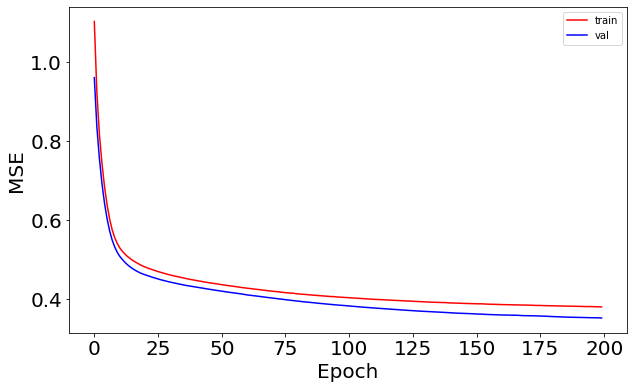

In [37]:
# Graficar el mse
model_history = model_search.fit(X_train,y_train,
                    epochs=epochs,
                    batch_size=200,
                    validation_data=(X_test,y_test))


fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['mse']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_mse']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'MSE', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

### Comparación de modelos

In [38]:
data_compar_cross = {'Modelo': ['LR', 'Ridge', 'RF','Tree', ' SVR', 'NN'], 'MSE': [mse_lr, mse_ridge, mse_rf, mse_tree,mse_svr, mse_nn],
                    'MAE':[mae_lr, mae_ridge, mae_rf, mae_tree,mae_svr, mae_nn],
                    'R2':[r2_lr, r2_ridge, r2_rf, r2_tree,r2_svr, r2_nn]} 
data_compar_cross = pd.DataFrame(data_compar_cross)
data_compar_cross

,Modelo,MSE,MAE,R2
0,LR,0.163589,0.311901,0.836411
1,Ridge,0.163572,0.312042,0.836428
2,RF,0.085517,0.208829,0.914483
3,Tree,0.108104,0.223100,0.891896
4,SVR,0.118553,0.257272,0.881447
5,NN,0.115033,0.256453,0.884967


In [39]:
#crear nuevos datos
X_new  = pd.DataFrame([[27, 0, 30, 5999, 7000]], columns=['age', 'gender', 'miles', 'debt', 'income'])
X_new

,age,gender,miles,debt,income
0,27,0,30,5999,7000


In [40]:
# Make new predictions

ynew = new_model_RF.predict(X_new)



D:\Anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [41]:
ynew

#Faltaría hacer ingeniería en reversa para revertir el escalemiento


array([1.89150135])

#### Anuncios parroquiales

Exámen próximo viernes 4 de Octubre en horario de clase. 
